# Modèle pour déterminer des positions optimales de villes


On va modéliser notre carte comme une matrice de cases, et considérer diverses couches.

+ chaque couche va être une matrice
+ chaque matrice va contenir des scores compris entre 0 (facteur observé ayant aucun impact) et 10 (facteur ayant un impact maximal)
+ à la fin, on va multiplier les matrices par un coefficient, et faire la somme de toutes les matrices

On obtiendra une surface 3D, et on recoupera celle-ci avec un plan pour obtenir des zones d'habitabilité.

In [21]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm
from matplotlib import lines
from math import sqrt

In [22]:
colors:dict[str,str] = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 

In [23]:
square:int = 8
plt.rcParams['axes.facecolor'] = '#d6e4dc'
plt.rcParams['figure.facecolor'] = '#d6e4dc'

In [24]:
def plot_map(
        mat:list[list[float]],
        alph:float = 0.15,
        annotation:bool = False,
        coordinates_to_highlight:list[tuple[int,int]] = None,
        savefig:bool = False
) -> None:
    'Fonction pour afficher la matrice de valeurs superposée à la carte'
    h = sns.heatmap(mat, alpha=alph, zorder=2, linewidths=2, linecolor='white',annot=annotation)
    my_image = mpimg.imread("./map.png")
    h.imshow(my_image,
        aspect=h.get_aspect(),
        extent= h.get_xlim() + h.get_ylim(),
        zorder=1
    )
    if annotation:
        for t in h.texts:
            if float(t.get_text())>0:
                t.set_text(t.get_text())
            else:
                t.set_text("")
    if coordinates_to_highlight is not None:
        for i in range(len(mat)):
            for j in range(len(mat)):
                if (j,i) in coordinates_to_highlight:
                    h.text(i + 0.5, j + 0.5, '★', color='gold', size=20, ha='center', va='center')
    if savefig:
        plt.savefig("matrix.png",transparent=True)
    plt.show()

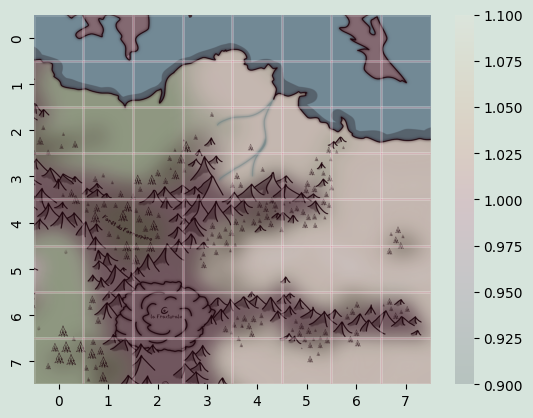

In [25]:
matrice:list[list[float]] = [[1 for i in range(square)] for i in range(square)]
matrice_empty:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

plot_map(matrice)

En premier, on va initialiser les mauvaises valeurs. Ce sont les endroits où on ne peut pas placer de ville (dans mon cas, l'océan)

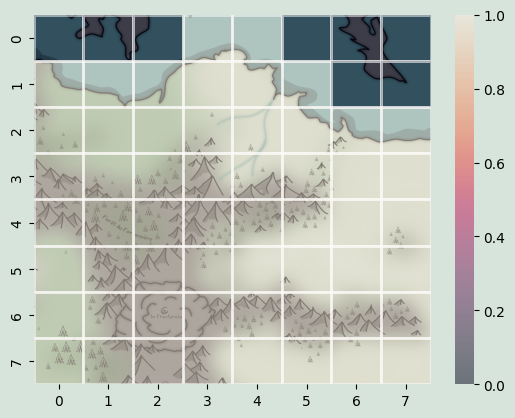

In [26]:
bad_coordinates:list[tuple] = [
    (0,0),
    (0,1),
    (0,2),
    (0,5),
    (0,6),
    (0,7),
    (1,6),
    (1,7)
]

for (x,y) in bad_coordinates:
    matrice[x][y] = 0

plot_map(matrice,.5)

Nous allons maintenant définir les différentes caractéristiques qui peuvent affecter le placement d'une ville.
+ dans cette version, les positions seront données par des séries d'assignations
+ on peut imaginer un modèle de DL pour lire l'image et en extraire cette information
+ ou un système pour encoder la carte

## Composante fluviale

Pouvoir avoir une rivière, ça offre :
+ une ressource quasi-illimitée d'eau douce
+ de la pêche
+ possibilité de commerce fluvial

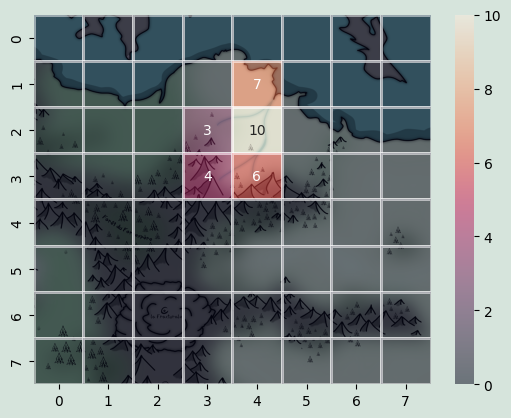

In [27]:
matrice_fleuve:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

matrice_fleuve[1][4] = 7
matrice_fleuve[2][3] = 3
matrice_fleuve[2][4] = 10
matrice_fleuve[3][3] = 4
matrice_fleuve[3][4] = 6

plot_map(matrice_fleuve,.5,True)

score_fleuve:float = .2

## Côtes

Avoir accès aux côtes, c'est :
+ accès à une ressource en poisson
+ possibilité d'installer un commerce maritime

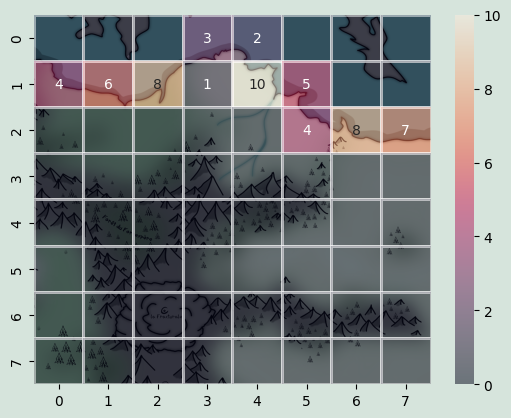

In [28]:
matrice_mer:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

matrice_mer[1][0] = 4
matrice_mer[1][1] = 6
matrice_mer[1][2] = 8
matrice_mer[1][3] = 1
matrice_mer[0][3] = 3
matrice_mer[0][4] = 2
matrice_mer[1][4] = 10
matrice_mer[1][5] = 5
matrice_mer[2][5] = 4
matrice_mer[2][6] = 8
matrice_mer[2][7] = 7

plot_map(matrice_mer,.5,True)

score_mer:float = .3

## Zones forestières

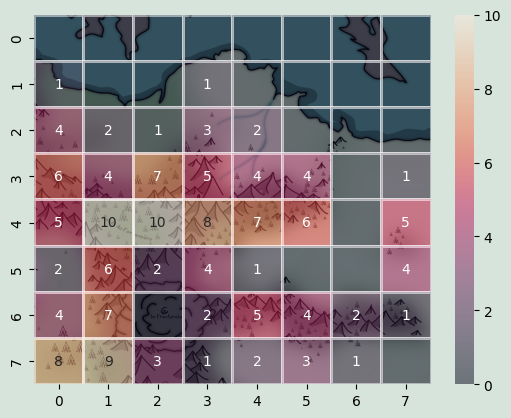

In [29]:
matrice_foret:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

matrice_foret[1][0] = 1
matrice_foret[2][0] = 4
matrice_foret[3][0] = 6
matrice_foret[4][0] = 5
matrice_foret[5][0] = 2
matrice_foret[6][0] = 4
matrice_foret[7][0] = 8
matrice_foret[2][1] = 2
matrice_foret[3][1] = 4
matrice_foret[4][1] = 10
matrice_foret[5][1] = 6
matrice_foret[6][1] = 7
matrice_foret[7][1] = 9
matrice_foret[2][2] = 1
matrice_foret[3][2] = 7
matrice_foret[4][2] = 10
matrice_foret[5][2] = 2
matrice_foret[7][2] = 3
matrice_foret[1][3] = 1
matrice_foret[2][3] = 3
matrice_foret[3][3] = 5
matrice_foret[4][3] = 8
matrice_foret[5][3] = 4
matrice_foret[6][3] = 2
matrice_foret[7][3] = 1
matrice_foret[2][4] = 2
matrice_foret[3][4] = 4
matrice_foret[4][4] = 7
matrice_foret[5][4] = 1
matrice_foret[6][4] = 5
matrice_foret[7][4] = 2
matrice_foret[3][5] = 4
matrice_foret[4][5] = 6
matrice_foret[6][5] = 4
matrice_foret[7][5] = 3
matrice_foret[6][6] = 2
matrice_foret[7][6] = 1
matrice_foret[3][7] = 1
matrice_foret[4][7] = 5
matrice_foret[5][7] = 4
matrice_foret[6][7] = 1

plot_map(matrice_foret,.5,True)

score_foret:float = .2

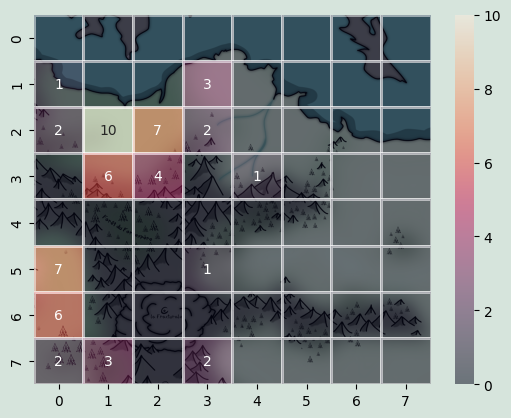

In [30]:
matrice_plaines:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

matrice_plaines[1][0] = 1
matrice_plaines[2][0] = 2
matrice_plaines[5][0] = 7
matrice_plaines[6][0] = 6
matrice_plaines[7][0] = 2
matrice_plaines[2][1] = 10
matrice_plaines[2][2] = 7
matrice_plaines[3][1] = 6
matrice_plaines[3][2] = 4
matrice_plaines[1][3] = 3
matrice_plaines[2][3] = 2
matrice_plaines[7][1] = 3
matrice_plaines[7][3] = 2
matrice_plaines[5][3] = 1
matrice_plaines[3][4] = 1

plot_map(matrice_plaines,.5,True)

score_plaines:float = .4

## Steppes glacées

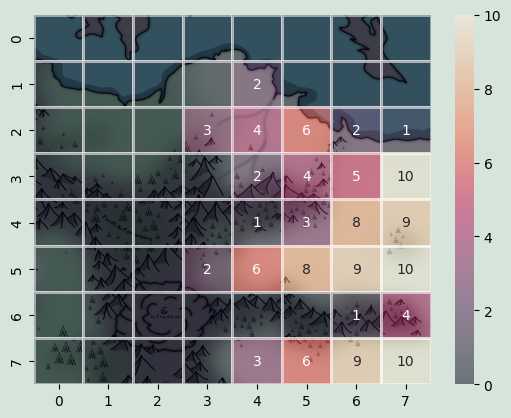

In [31]:
matrice_steppes:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

matrice_steppes[1][4] = 2
matrice_steppes[2][4] = 4
matrice_steppes[2][3] = 3
matrice_steppes[3][4] = 2
matrice_steppes[2][5] = 6
matrice_steppes[3][5] = 4
matrice_steppes[3][7] = 10
matrice_steppes[4][7] = 9
matrice_steppes[5][7] = 10
matrice_steppes[6][7] = 4
matrice_steppes[7][7] = 10
matrice_steppes[7][6] = 9
matrice_steppes[7][5] = 6
matrice_steppes[7][4] = 3
matrice_steppes[5][6] = 9
matrice_steppes[5][5] = 8
matrice_steppes[5][4] = 6
matrice_steppes[5][3] = 2
matrice_steppes[6][6] = 1
matrice_steppes[4][6] = 8
matrice_steppes[2][6] = 2
matrice_steppes[2][7] = 1
matrice_steppes[3][6] = 5
matrice_steppes[4][4] = 1
matrice_steppes[4][5] = 3

plot_map(matrice_steppes,.5,True)

score_steppes:float = -.7

# Aggrégation des matrices

Dans cette partie, on va :
+ multiplier chaque matrice par un score (positif ou négatif)
+ additionner ces scores
+ multiplier par le masque pour supprimer les cases interdites

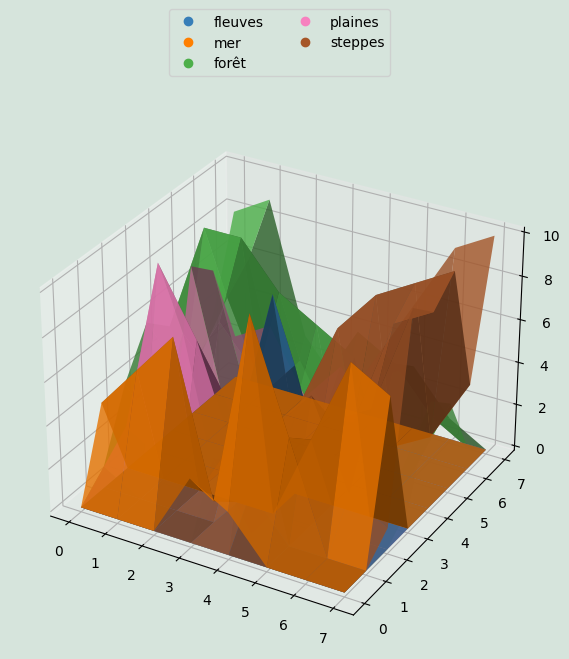

In [32]:
matrices_to_aggregate:list = [
    (matrice_fleuve,score_fleuve,'fleuves'),
    (matrice_mer,score_mer,'mer'),
    (matrice_foret,score_foret,'forêt'),
    (matrice_plaines,score_plaines,'plaines'),
    (matrice_steppes,score_steppes,'steppes'),
]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1, projection='3d')
a, b = np.meshgrid(list(range(square)), list(range(square)))

fake2Dlines:list = list()
names:list = list()
for i,(mat,score,name) in enumerate(matrices_to_aggregate):
    array = np.array(mat)
    ax.plot_surface(a, b, array, alpha=.8, color=colors[list(colors.keys())[i]])
    fake2Dlines.append(lines.Line2D([0],[0], linestyle="none", marker = 'o', color=colors[list(colors.keys())[i]]))
    names.append(name)
ax.legend(fake2Dlines, names, numpoints = 1,ncol=int(len(names)/2),loc='lower center',bbox_to_anchor=(0.5, 1.05))
plt.savefig("multisurface.png",transparent=True)
plt.show()

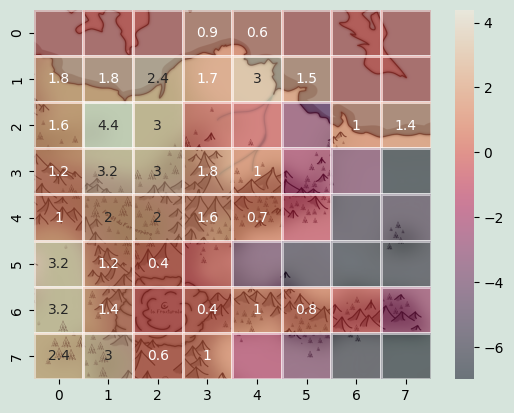

In [33]:
matrice_final:list[list[float]] = [[0 for i in range(square)] for i in range(square)]

for (mat,score,name) in matrices_to_aggregate:
    for x in range(square):
        for y in range(square):
            matrice_final[x][y] += matrice[x][y] * (mat[x][y]*score)

plot_map(matrice_final,.5,True,savefig=True)


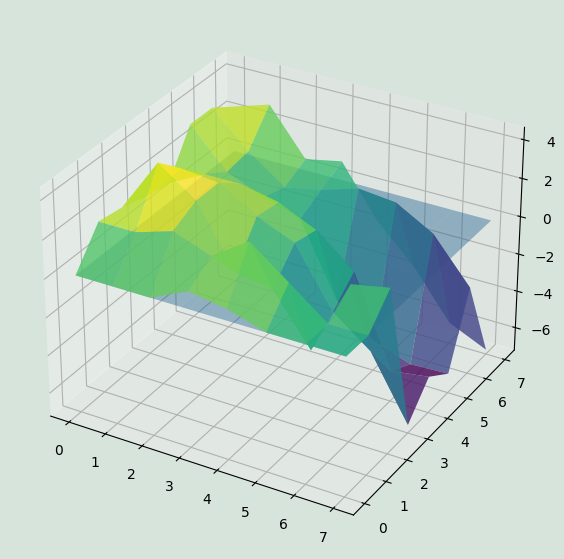

In [34]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1, projection='3d')
a, b = np.meshgrid(list(range(square)), list(range(square)))
array = np.array(matrice_final)
array_empty = np.array(matrice_empty)
ax.plot_surface(a, b, array_empty, alpha=.4)
ax.plot_surface(a, b, array, alpha=.8,cmap=cm.viridis)
plt.savefig("surface.png",transparent=True)
plt.show()

# Problème d'optimisation

La question "ou placer les villes" ? peut être répondue de plusieurs manières. Parmi toutes les possibles, on va en étudier deux, et en implémenter une.

- une première consiste à utiliser un seuil d'habitabilité, placé à une valeur arbitraire, où on considère que tous les points au-dessus de cette limite sont habitables.
- une seconde consiste à définir une origine, et considérer qu'on en radie. On pose un point d'origine, une fonction de distance, une limite de sauts, et on exécute un algorithme qui va parcourir l'espace de points possibles pour nous.

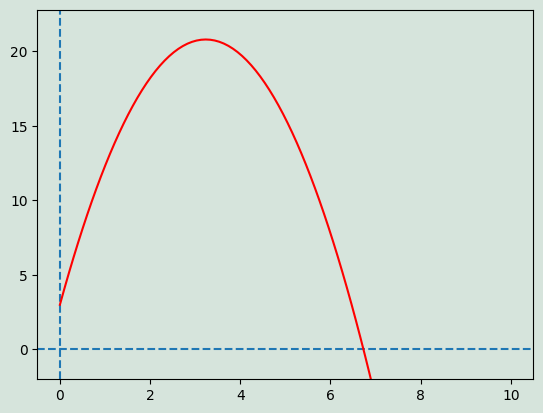

In [35]:
lower_limit = 0
upper_limit = 10
num_pts = 100
x = np.linspace(lower_limit, upper_limit, num_pts)
poly_coefs = [-1.7,11,3]
y = np.polyval(poly_coefs, x)
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')
plt.ylim((-2,max(y)+2))
plt.plot(x, y, '-r')

In [36]:
def optimize_cities(
        matrix:list[list[float]],
        starting_point:tuple[int,int],
        max_points:int = 4,
) -> list[tuple[int,int]]:
    cities:list[tuple[int,int]] = [starting_point]

    for _ in range(max_points):
        distance_matrix:list[list[float]] = [[0 for _ in range(square)] for _ in range(square)]
        for x,y in cities:
            for a in range(square):
                for b in range(square):
                    distance_to_city:float = sqrt((x-a)**2+(y-b)**2)
                    distance_matrix[a][b] = (-(1.7*distance_to_city)**2 + 11*distance_to_city + 3)/10
        # plot_map(distance_matrix,alph=.9,annotation=True)
        # We define the next location
        next_city_location:tuple[int,int] = False
        max_score:float = 0
        for h in range(square):
            for i in range(square):
                score:float = matrix[h][i]*max(distance_matrix[h][i],0)
                if score > 0 and score > max_score and not (i,h) in cities:
                    next_city_location = (h,i)
                    max_score = score
        cities.append(next_city_location)
    return cities

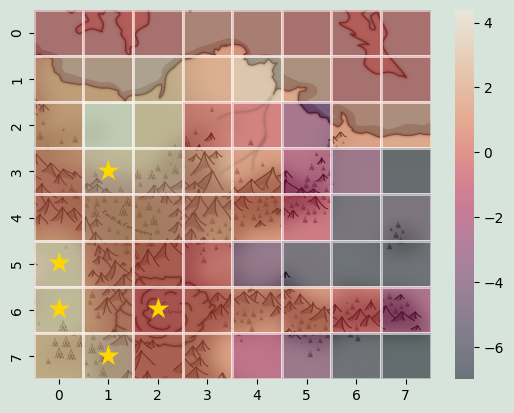

In [37]:
cities_positions:list[tuple[int,int]] = optimize_cities(
    matrice_final,
    (6,2),
)

plot_map(matrice_final,.5,coordinates_to_highlight=cities_positions)